In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import cv2 
import os 
import random

In [10]:
path = '/Users/charleshajjar/Desktop/dentition/data/train/'
path_val = '/Users/charleshajjar/Desktop/dentition/data/val/'

In [11]:
for imgfolder in os.listdir(path):
    for filename in os.listdir(path + imgfolder):
        filename = path + imgfolder + '/' + filename
        img = cv2.imread(filename,0)
        #print (img.shape)   

In [ ]:
# scaling all images to 47 * 62 using OpenCV resize function
for imgfolder in os.listdir(path):
    for filename in os.listdir(path + imgfolder):
        filename = path + imgfolder+ '/'+ filename
        img=cv2.imread(filename,0)
        img = cv2.resize(img, (300,300), interpolation = cv2.INTER_AREA)
        print(type(img))
        print(img.shape)

In [6]:
#random.shuffle()

In [ ]:
# building an array of images and finding its shape.
X_images = []
for imgfolder in os.listdir(path):
    for filename in os.listdir(path + imgfolder):
        filename = path + imgfolder + '/' + filename
        #print(filename)
        img = cv2.imread(filename,0)
        img = cv2.resize(img, (300,300), interpolation = cv2.INTER_AREA)
        X_images.append(img)
X_images = np.asarray(X_images)
X_images.shape

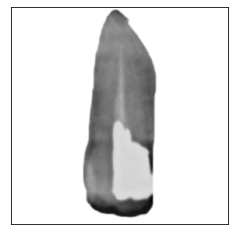

In [7]:
#trying display a single image just to check
plt.imshow(X_images[39], cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [8]:
# building an 1D array of labels for the training dataset
y_train = []
for imgfolder in os.listdir(path):
    for filename in os.listdir(path + imgfolder):
        y_train.append(imgfolder)
y_train = np.asarray(y_train)
y_train.shape

(62,)

In [9]:
y_train

array(['molaire', 'molaire', 'molaire', 'molaire', 'molaire', 'molaire',
       'molaire', 'molaire', 'molaire', 'molaire', 'molaire', 'molaire',
       'molaire', 'molaire', 'molaire', 'molaire', 'molaire', 'molaire',
       'molaire', 'incisive', 'incisive', 'incisive', 'incisive',
       'incisive', 'incisive', 'incisive', 'incisive', 'incisive',
       'incisive', 'incisive', 'incisive', 'incisive', 'incisive',
       'incisive', 'incisive', 'incisive', 'incisive', 'incisive',
       'premolaire', 'premolaire', 'premolaire', 'premolaire',
       'premolaire', 'premolaire', 'premolaire', 'premolaire',
       'premolaire', 'premolaire', 'premolaire', 'premolaire',
       'premolaire', 'premolaire', 'premolaire', 'premolaire',
       'premolaire', 'premolaire', 'premolaire', 'premolaire',
       'premolaire', 'premolaire', 'premolaire', 'premolaire'],
      dtype='<U10')

In [10]:
#Build array of images for Test/Validation dataset
X_test = []
for imgfolder in os.listdir(path_val):
    for filename in os.listdir(path_val + imgfolder):
         if(filename.endswith('.png')):
                filename = path_val + imgfolder + '/' + filename
                print(filename)
                img = cv2.imread(filename,0)
                img = cv2.resize(img, (300,300), interpolation = cv2.INTER_AREA)
                X_test.append(img)
X_test = np.asarray(X_test)

/Users/charleshajjar/Desktop/data_dent/data/val/molaire/104876685_296297951409952_4445135669886322074_n.png
/Users/charleshajjar/Desktop/data_dent/data/val/molaire/104910860_703728173536971_4797924955036566029_n.png
/Users/charleshajjar/Desktop/data_dent/data/val/molaire/104161394_268637544408744_3767923034954503217_n.png
/Users/charleshajjar/Desktop/data_dent/data/val/molaire/104463286_563694884542343_936862888083503945_n.png
/Users/charleshajjar/Desktop/data_dent/data/val/molaire/104495098_282565443121383_4423467636559394725_n.png
/Users/charleshajjar/Desktop/data_dent/data/val/molaire/104411050_1152282958481823_6696119235861728294_n.png
/Users/charleshajjar/Desktop/data_dent/data/val/molaire/104660956_553896752180905_5034155299455752578_n.png
/Users/charleshajjar/Desktop/data_dent/data/val/molaire/104611587_266479527778073_6314213147888117104_n.png
/Users/charleshajjar/Desktop/data_dent/data/val/molaire/104494797_1131016150588421_5406059333281801242_n.png
/Users/charleshajjar/Deskto

In [11]:
#Building a 1D array of test labels
y_test = []
for imgfolder in os.listdir(path_val):
    for filename in os.listdir(path_val + imgfolder):
        y_test.append(imgfolder)
y_test = np.asarray(y_test)

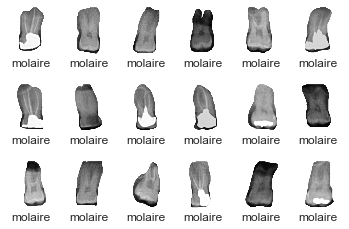

In [12]:
#display training images and labels to make sure they lineup correctly
%matplotlib inline
import seaborn as sns; sns.set()

fig,ax = plt.subplots(3,6)
for i, axis in enumerate(ax.flat):
    axis.imshow(X_images[i], cmap= 'gray')
    axis.set(xticks = [], yticks=[], xlabel=y_train[i])

In [13]:
import warnings
warnings.filterwarnings("ignore")
# code for the SVC Face recognition example.
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
#extracting only 10 features out of 47*62 = 2914 features
pca = PCA(n_components=71, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [14]:
#flatten images.
X_train = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

In [15]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=71, svd_solver='randomized', whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [16]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'pca__n_components': [10],
    'svc__C': [1, 5, 10,71], # model__parametre
    'svc__gamma': [0.0001, 0.0005, 0.001, 0.002]
}
grid = GridSearchCV(model, param_grid)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

CPU times: user 59.6 s, sys: 1.85 s, total: 1min 1s
Wall time: 15.4 s
{'pca__n_components': 10, 'svc__C': 71, 'svc__gamma': 0.001}


In [17]:
model = grid.best_estimator_
y_pred = model.predict(X_test)
model

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=42, svd_solver='randomized', tol=0.0,
                     whiten=True)),
                ('svc',
                 SVC(C=71, break_ties=False, cache_size=200,
                     class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.001,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

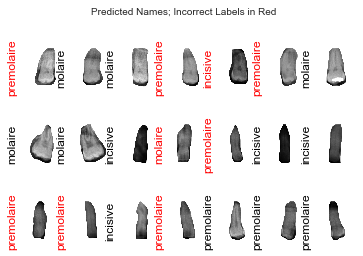

In [19]:
fig, ax = plt.subplots(3, 7)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(300, 300), cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(y_pred[i].split()[-1],
                   color='black' if y_pred[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=10);

In [20]:
print(y_pred)

['premolaire' 'molaire' 'molaire' 'premolaire' 'incisive' 'premolaire'
 'molaire' 'molaire' 'molaire' 'incisive' 'molaire' 'premolaire'
 'incisive' 'incisive' 'premolaire' 'premolaire' 'incisive' 'premolaire'
 'premolaire' 'premolaire' 'premolaire' 'incisive' 'premolaire'
 'premolaire' 'premolaire']


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

    incisive       0.67      0.44      0.53         9
     molaire       0.83      0.56      0.67         9
  premolaire       0.46      0.86      0.60         7

    accuracy                           0.60        25
   macro avg       0.65      0.62      0.60        25
weighted avg       0.67      0.60      0.60        25



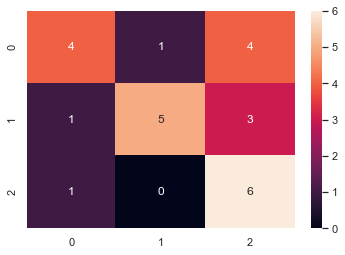

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

In [23]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier(base_estimator=None,
                              learning_rate=1.0,
                              n_estimators=200)

adaBoost.fit(X_train, y_train)

y_preds = adaBoost.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_preds)

0.44

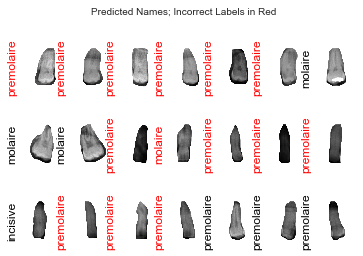

In [25]:
fig, ax = plt.subplots(3,7)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(300, 300), cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(y_preds[i].split()[-1],
                   color='black' if y_preds[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=10);

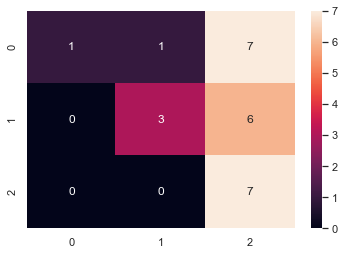

In [26]:
cf_matrix = confusion_matrix(y_test, y_preds)
sns.heatmap(cf_matrix, annot=True)

In [27]:
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

    incisive       0.67      0.44      0.53         9
     molaire       0.83      0.56      0.67         9
  premolaire       0.46      0.86      0.60         7

    accuracy                           0.60        25
   macro avg       0.65      0.62      0.60        25
weighted avg       0.67      0.60      0.60        25

